<a href="https://colab.research.google.com/github/TristanNUSantos/Emtech2/blob/main/Assignment_7_1_Classifications_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Name: Santos, Tristan Neal U.
- Section: CPE32S9
- Teacher: Engr. Roman Richard

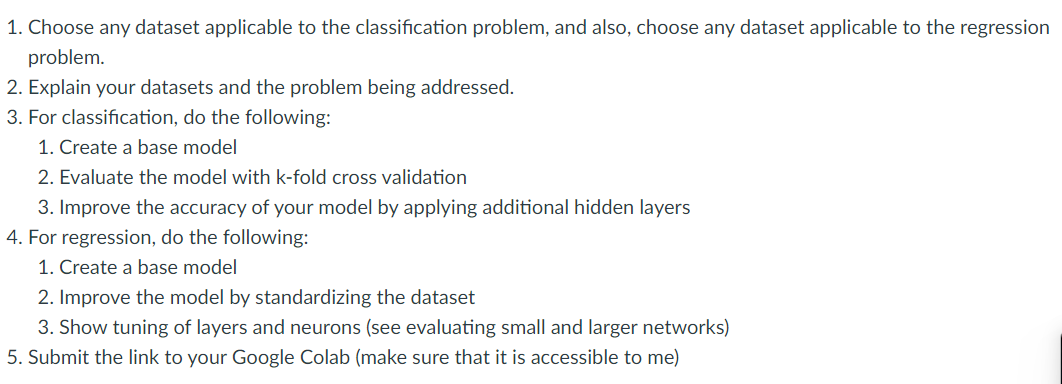

# **Classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


As you can see, the code focus regarding the classification of this problem is we used a neural network model with the csv focus on diabetes related based on various medical features.

In [ ]:
#1
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset from a CSV file
filepath = "/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

# Step 2: Preprocess the dataset
X = diabetes_df.iloc[:, :-1].values
y = to_categorical(diabetes_df.iloc[:, -1].values)  # Convert labels to one-hot encoding

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4836 - loss: 2.8583
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 0.9606 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 0.9014 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 0.7861 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 0.8298  
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6236 - loss: 0.7827 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - loss: 0.6026 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 0.6898 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.7793  
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5931 - loss: 0.8384
Test Loss: 0.6668481230735779
Test Accuracy: 0.6753246784210205


In [ ]:
#2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset from a CSV file
filepath = "/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

# Step 2: Preprocess the dataset
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values

# Step 3: Create the model
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(X.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)

# Step 5: Evaluate the model with k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()* 100, scores.std() * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will ra

Cross-Validation Accuracy: 68.49 (+/- 1.06)


In [ ]:
#3
# Step 1: Load the dataset from a CSV file
filepath = "/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

# Step 2: Preprocess the dataset
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values

# Step 3: Create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)

# Step 5: Evaluate the model with k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Baseline: 67.69% (4.04%)


# **Regression**

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# Step 1: Load the dataset from a CSV file
filepath = "/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

# Step 2: Preprocess the dataset
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values

# Step 3: Create a base model
def create_base_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Step 4: Define a custom wrapper for KerasRegressor
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn=None, **kwargs):
        self.build_fn = build_fn
        self.sklearn_model = None
        self.kwargs = kwargs

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.sklearn_model = self.build_fn(**self.kwargs)
        self.sklearn_model.fit(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.sklearn_model.predict(X)

# Step 5: Evaluate the base model
base_model = KerasRegressorWrapper(build_fn=create_base_model, epochs=100, batch_size=10, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
base_scores = -cross_val_score(base_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Base Model MSE: %.2f" % base_scores.mean())

# Step 6: Improve the model by standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Define a model with more layers and neurons
def create_larger_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X_scaled.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Step 8: Evaluate the larger model
larger_model = KerasRegressorWrapper(build_fn=create_larger_model, epochs=100, batch_size=10, verbose=0)
larger_scores = -cross_val_score(larger_model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1176.0397  


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208.0281


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11100.3184   


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3464.0364   


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15921.0498   
Base Model MSE: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8452


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6958


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1210   


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8882   


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3067   
Standardized: 67.69% (4.04%)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "<ipython-input-28-92badeeb30b2>", line 47, in predict
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1622, in check_is_fitted
    raise No

# Conclusion:

This lesson, we have learned about how to use Keras Deep Learning as a way for us to see some classification/regression related problems. From the procedures we make, we apply on the baseline model from the previous lesson we apply to for it to be used on the code, adjust performance to help improve the output and knowing the results based on the codes we used.